Confusion Matrix:
[[3 0 0]
 [1 2 0]
 [0 1 3]]

Metrics:
Class 0:
  TP: 3
  TN: 6
  FP: 1
  FN: 0
Class 1:
  TP: 2
  TN: 6
  FP: 1
  FN: 1
Class 2:
  TP: 3
  TN: 6
  FP: 0
  FN: 1

Precision per class:
Class 0: 0.75
Class 1: 0.67
Class 2: 1.00
Recall per class:
Class 0: 1.00
Class 1: 0.67
Class 2: 0.75
F1 Score per class:
Class 0: 0.86
Class 1: 0.67
Class 2: 0.86

Overall Accuracy: 0.80


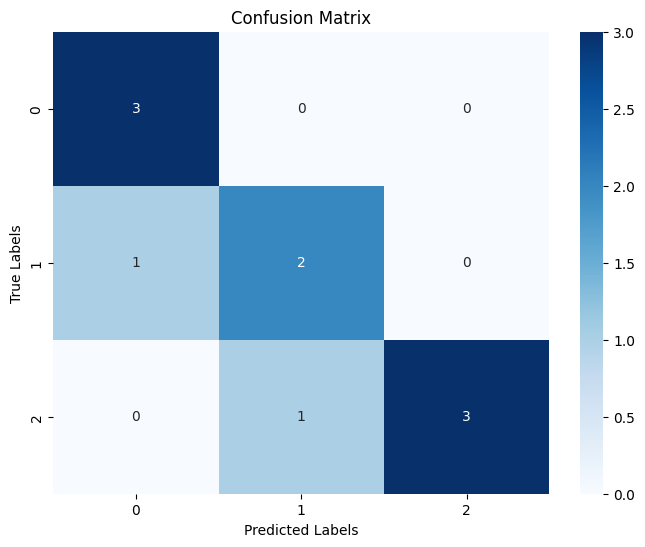

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

# Example function to calculate TP, TN, FP, FN for each class
def calculate_metrics(cm):
    metrics = {}
    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)
        metrics[f'Class {i}'] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
    return metrics

# Visualization function
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example data
true_labels = [0, 1, 2, 0, 1, 2, 0, 2, 2, 1]  # Ground truth labels
predicted_labels = [0, 1, 2, 0, 0, 2, 0, 1, 2, 1]  # Predicted labels

# Generate confusion matrix
classes = np.unique(true_labels)
cm = confusion_matrix(true_labels, predicted_labels, labels=classes)

# Calculate metrics
metrics = calculate_metrics(cm)

# Calculate additional scores
precision = precision_score(true_labels, predicted_labels, average=None)
recall = recall_score(true_labels, predicted_labels, average=None)
f1 = f1_score(true_labels, predicted_labels, average=None)
accuracy = accuracy_score(true_labels, predicted_labels)

# Display results
print("Confusion Matrix:")
print(cm)
print("\nMetrics:")
for class_name, values in metrics.items():
    print(f"{class_name}:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")

print("\nPrecision per class:")
for i, p in enumerate(precision):
    print(f"Class {i}: {p:.2f}")

print("Recall per class:")
for i, r in enumerate(recall):
    print(f"Class {i}: {r:.2f}")

print("F1 Score per class:")
for i, f in enumerate(f1):
    print(f"Class {i}: {f:.2f}")

print(f"\nOverall Accuracy: {accuracy:.2f}")

# Visualize confusion matrix
plot_confusion_matrix(cm, classes)